In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as data
print("All library imported sucessfully")

All library imported sucessfully


In [2]:
from pandas_datareader import data as data
yf.pdr_override()
print("imported data elemnt as data from panda_datareader")

imported data elemnt as data from panda_datareader


In [3]:
start='2012-01-01'
end='2019-12-31'
k='AAPL'

df= data.DataReader(k,start,end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586556,260022000
2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838935,394024400


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23 00:00:00-05:00,70.132500,71.062500,70.092499,71.000000,69.557114,98572000
2019-12-24 00:00:00-05:00,71.172501,71.222504,70.730003,71.067497,69.623230,48478800
2019-12-26 00:00:00-05:00,71.205002,72.495003,71.175003,72.477501,71.004570,93121200
2019-12-27 00:00:00-05:00,72.779999,73.492500,72.029999,72.449997,70.977638,146266000
2019-12-30 00:00:00-05:00,72.364998,73.172501,71.305000,72.879997,71.398888,144114400


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586556,260022000
2,2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
3,2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
4,2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838935,394024400


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


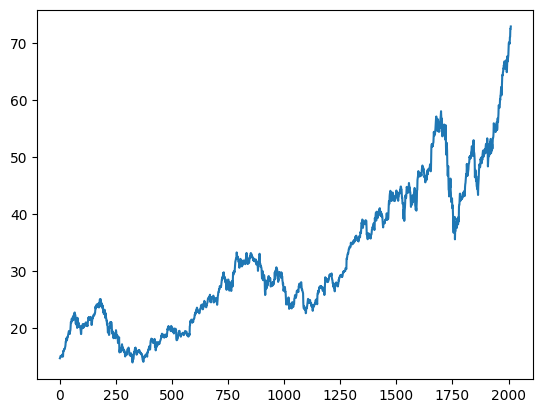

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2006,70.132500,71.062500,70.092499,71.000000,98572000
2007,71.172501,71.222504,70.730003,71.067497,48478800
2008,71.205002,72.495003,71.175003,72.477501,93121200
2009,72.779999,73.492500,72.029999,72.449997,146266000


ma100=df.Close.rolling(100).mean()
ma100

In [9]:
ma100=df.Close.rolling(100).mean()
ma100


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2006    59.201075
2007    59.401700
2008    59.643125
2009    59.875125
2010    60.106325
Name: Close, Length: 2011, dtype: float64

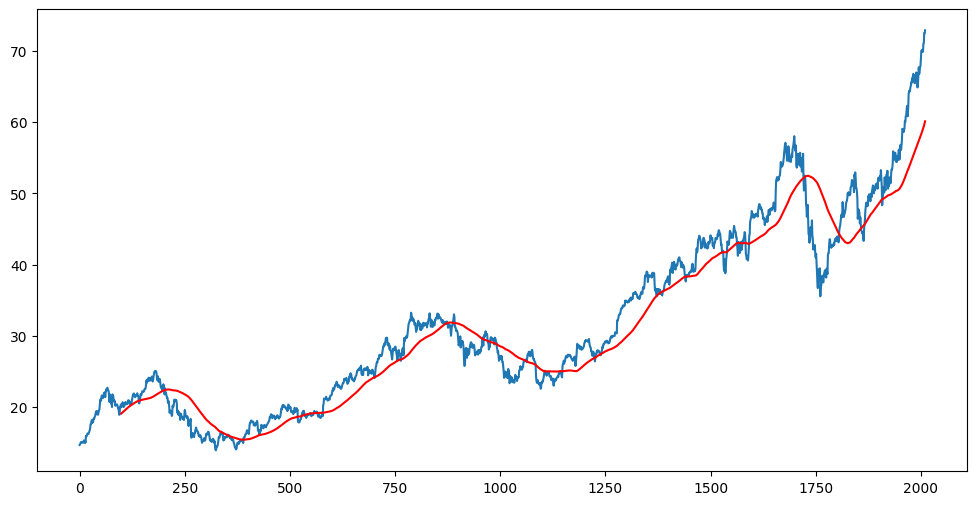

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2006    54.132313
2007    54.261513
2008    54.396763
2009    54.529350
2010    54.661100
Name: Close, Length: 2011, dtype: float64

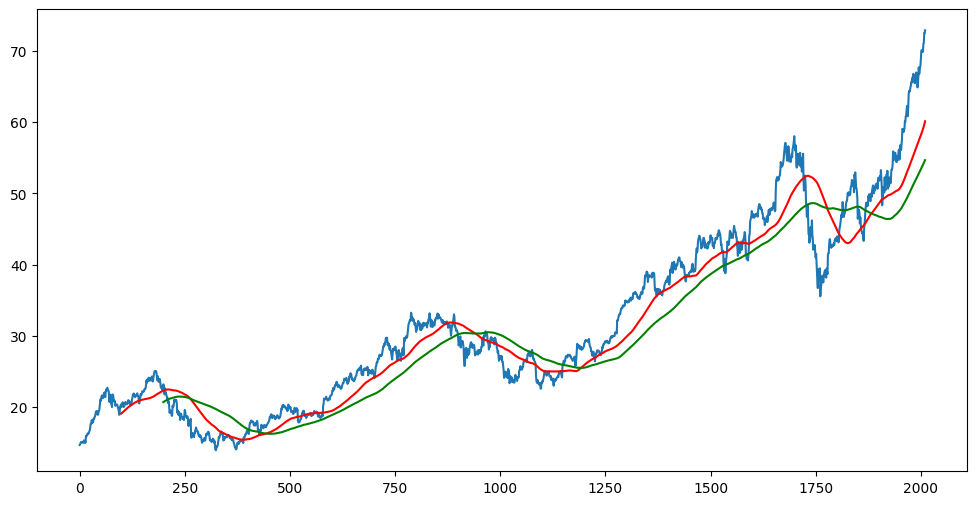

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [13]:
df.shape

(2011, 5)

In [14]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1407, 1)
(604, 1)


In [15]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [16]:
data_testing.head()

,Close
1407,39.702499
1408,40.020000
1409,40.264999
1410,38.830002
1411,39.369999


In [17]:
data_testing.tail()

,Close
2006,71.000000
2007,71.067497
2008,72.477501
2009,72.449997
2010,72.879997


In [18]:
#scaling the data 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
print("sucessfully imported and ranged tha data")

sucessfully imported and ranged tha data


In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array.shape
data_training_array

array([[0.02917752],
       [0.03229259],
       [0.03876241],
       ...,
       [1.        ],
       [0.9845092 ],
       [0.9925999 ]])

In [20]:
x_train=[]
y_train=[]


for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
print("converted to numpy array sucessfullly")
    


converted to numpy array sucessfullly


In [21]:
 #making ml model
    
    

In [22]:
#importing elements from keras
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
print("keras layers and modle imported sucessfully")

keras layers and modle imported sucessfully


In [23]:
#greating sequential model
model=Sequential()
#adding layers in the model
model.add(LSTM (units =50,activation ='relu',return_sequences =True, 
               input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM (units =60,activation ='relu',return_sequences =True))
model.add(Dropout(0.3))



model.add(LSTM (units =80,activation ='relu',return_sequences =True))
model.add(Dropout(0.4))


model.add(LSTM (units =120,activation ='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))
print("model build sucessfully and all layers added")



model build sucessfully and all layers added


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
# traning model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs= 50)
print("model trained")

Epoch 1/50
41/41 [==============================] - 28s 324ms/step - loss: 0.0501
Epoch 2/50
41/41 [==============================] - 13s 318ms/step - loss: 0.0107
Epoch 3/50
41/41 [==============================] - 14s 331ms/step - loss: 0.0099
Epoch 4/50
41/41 [==============================] - 15s 354ms/step - loss: 0.0092
Epoch 5/50
41/41 [==============================] - 14s 337ms/step - loss: 0.0080
Epoch 6/50
41/41 [==============================] - 13s 312ms/step - loss: 0.0079
Epoch 7/50
41/41 [==============================] - 14s 334ms/step - loss: 0.0075
Epoch 8/50
41/41 [==============================] - 19s 469ms/step - loss: 0.0072
Epoch 9/50
41/41 [==============================] - 15s 376ms/step - loss: 0.0067
Epoch 10/50
41/41 [==============================] - 15s 378ms/step - loss: 0.0070
Epoch 11/50
41/41 [==============================] - 21s 520ms/step - loss: 0.0072
Epoch 12/50
41/41 [==============================] - 23s 565ms/step - loss: 0.0063
Epoch 13/50
4

In [26]:
model.save('Kera_model.h5')
print("model saved")

model saved


In [27]:
data_testing.head()

,Close
1407,39.702499
1408,40.020000
1409,40.264999
1410,38.830002
1411,39.369999


In [28]:
data_training.tail(100)

,Close
1307,35.115002
1308,35.172501
1309,34.997501
1310,35.365002
1311,34.959999
...,...
1402,37.182499
1403,37.512501
1404,39.285000
1405,38.892502


In [29]:
#giving the model previous 100 days data to predict the values
past_days=data_training.tail(100)

In [30]:
final_df=pd.concat([past_days,data_testing],axis =0)

In [31]:
final_df.head()

,Close
1307,35.115002
1308,35.172501
1309,34.997501
1310,35.365002
1311,34.959999


In [32]:
input_data=scaler.fit_transform(final_df)
input_data

array([[4.08762135e-03],
       [5.60394346e-03],
       [9.88984458e-04],
       [1.06804487e-02],
       [0.00000000e+00],
       [1.04166792e-02],
       [7.12026558e-03],
       [5.27428198e-03],
       [6.85659675e-03],
       [2.61076405e-02],
       [2.82172929e-02],
       [2.69646396e-02],
       [2.51846487e-02],
       [2.54483175e-02],
       [3.25026910e-02],
       [2.75580705e-02],
       [2.51846487e-02],
       [2.30748956e-02],
       [2.19541271e-02],
       [1.18012172e-02],
       [1.29219858e-02],
       [7.97736532e-03],
       [1.31197626e-02],
       [8.96624918e-03],
       [5.53795081e-03],
       [1.71413913e-02],
       [1.60206227e-02],
       [2.50527639e-02],
       [3.09203762e-02],
       [2.53164328e-02],
       [2.60416478e-02],
       [2.51186560e-02],
       [4.44356924e-02],
       [5.05669735e-02],
       [4.76002213e-02],
       [4.41060309e-02],
       [6.01266536e-02],
       [8.68275238e-02],
       [9.32885670e-02],
       [8.84757306e-02],


In [33]:
input_data.shape

(704, 1)

In [34]:
x_test=[]
y_test=[]


for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100 :i])
    y_test.append(input_data[i,0])
  

In [35]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(604, 100, 1)
(604,)


In [36]:
#making predection 


y_predicted=model.predict(x_test)

19/19 [==============================] - 6s 145ms/step


In [37]:
y_predicted.shape

(604, 1)

In [38]:
y_predicted

array([[0.08905348],
       [0.09080902],
       [0.09298575],
       [0.09566778],
       [0.09864163],
       [0.10170454],
       [0.10478249],
       [0.10791273],
       [0.11110212],
       [0.11419457],
       [0.11700833],
       [0.11939695],
       [0.12138054],
       [0.12304309],
       [0.12444352],
       [0.12565091],
       [0.12679017],
       [0.12802209],
       [0.12947308],
       [0.13122669],
       [0.13329974],
       [0.13556042],
       [0.13783811],
       [0.13995567],
       [0.14166959],
       [0.14292797],
       [0.14374077],
       [0.14410669],
       [0.14399154],
       [0.14346525],
       [0.14258434],
       [0.14141965],
       [0.13995239],
       [0.13810736],
       [0.13581434],
       [0.13303801],
       [0.12987375],
       [0.12650268],
       [0.12308624],
       [0.11978275],
       [0.11670691],
       [0.11395061],
       [0.11153989],
       [0.10952151],
       [0.10791987],
       [0.10674395],
       [0.10597715],
       [0.105

In [39]:
scaler.scale_

array([0.02637131])

In [40]:
scale_factor=1/0.02637131
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

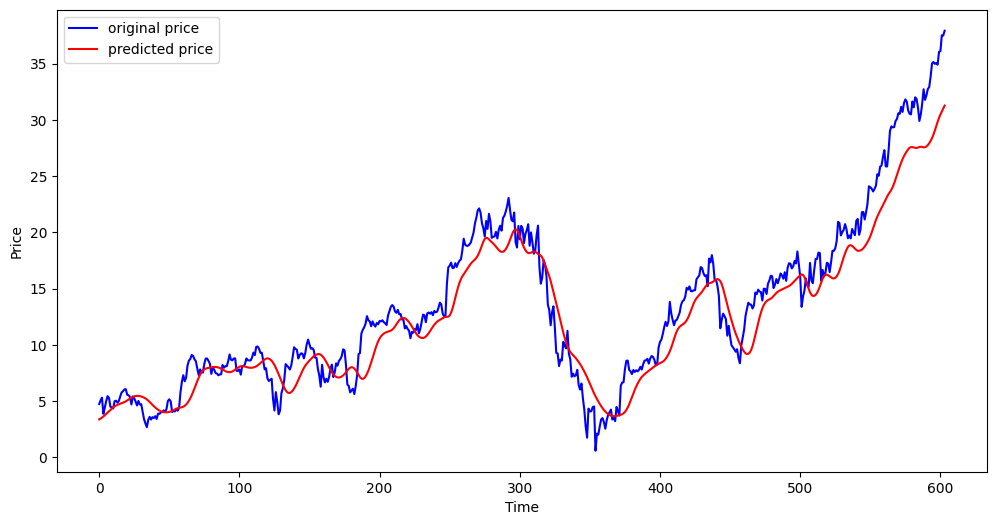

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [42]:
print("done completely ")

done completely 
